## From this notebook, we are going to build forcasting models to predict sale price.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/sales.csv')

In [4]:
df.dropna(subset=['price'], inplace=True)

In [5]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


# 1. Data Split

<font color='red'>Assignment:</font> Split the DataFrame into two parts. One contains the sales happened before 2015. The other contains the sales happened not earlier than 2015. Name these two parts **train_raw** and **test_raw**, respectively.

In [11]:
purchase_date = pd.to_datetime(df.purchase_date)
#purchase_date.head()
train_raw = df[purchase_date < pd.Timestamp("2015-01-01")]
#train_raw.head()
test_raw = df[purchase_date >= pd.Timestamp("2015-01-01")]
#test_raw.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
10,$160k,"$168,762",3 Ton 440 Kg,Oct 28 2016,H,super advanced,M14128,"IN732088,IN732089,IN732090,IN732091,IN732092",2.91 meters,100 cm,26 cm
22,$160k,"$605,022",3 Ton 120 Kg,Mar 27 2015,"D,A",super advanced,M14137,"IN732121,IN732122,IN732126,IN732134,IN732135,I...",2.93 meters,95 cm,25 cm
23,NaN,"$4,444",2 Ton 980 Kg,Aug 07 2015,"T,H",advanced,NaN,NaN,2.14 meters,109 cm,28 cm
50,$18k,"$17,932",3 Ton 210 Kg,Jun 24 2016,H,advanced,M14162,"IN732118,IN732240",2.58 meters,103 cm,27 cm


<font color='red'>Question:</font> Why do we want to split data in this way?

In [13]:
# "train_raw" is used to train the model, "test_raw" is used to test/validate the trained model.
# This is because the trained model usually fits the training dataset overly well so we need the unused subset of the data
# to test predition power of the trained model.

# 2. Generate Targets

<font color='red'>Assignment:</font> Transform the **price** columns in **train_raw** and **test_raw** into two numerical series. Name them as **y_train** and **y_test**.

In [22]:
y_train = train_raw.price.map(lambda x: float(x.strip('$').replace(',','')))
#y_train.head()
y_test = test_raw.price.map(lambda x: float(x.strip('$').replace(',','')))
#y_test.head()

# 3. Simplest Models

## 3.1 Random Guess Model

### 3.1.1 Model Building

**Example:** Class for random guess model.

In [23]:
import numpy as np

class random_guess(object):
    """
    This class provides random values between the minimum and maximum 
    of y_train as predictions.
    """
    
    def fit(self, y_train):
        self.y_min = min(y_train)
        self.y_max = max(y_train)
        
    def predict(self, y_test):
        length = len(y_test)
        return np.random.uniform(self.y_min, self.y_max, length)

**Example:** Initialize model

In [24]:
model = random_guess()

**Example:** Train the model using **y_train**

In [25]:
model.fit(y_train)

### 3.1.2 Training Loss

**Example:** Make prediction using the **training data**

In [26]:
y_train_pred = model.predict(y_train)

**Example:** Visualize the difference between predictions and ground truth

In [27]:
import matplotlib.pylab as plt
%matplotlib inline

Text(0, 0.5, 'y_train_pred')

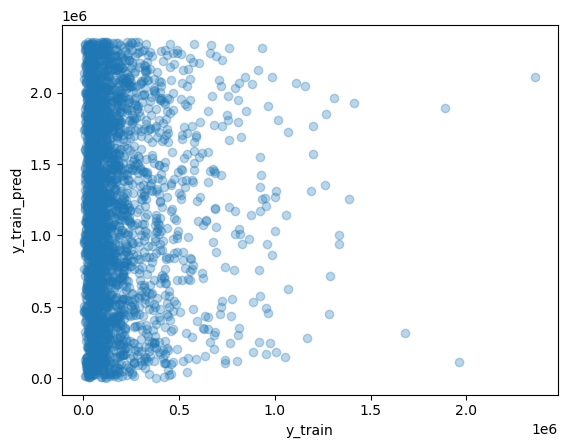

In [28]:
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

**Example:** Calculate the **training loss**

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.04e+06
train MSE: 1.51e+12
train R2: -34.404


<font color='red'>Question:</font> What is a metric?

In [ ]:
#A metric is a function/parameter used to judge the performance of a model

<font color='red'>Question:</font> How these metrics are calculated? What do they measure?

In [ ]:
# MAE is the Mean absolute error regression loss
# MSE is the Mean squared error regression loss
# R2 is the regression score function
# They measure the overall deviation of the predicted values from the actual values

### 3.1.3 Test loss

**Example:** Make prediction using the **test data**

In [31]:
y_pred_test = model.predict(y_test)

<font color='red'>Assignment:</font> Visualize the difference between predictions and ground truth.

Text(0, 0.5, 'y_pred_test')

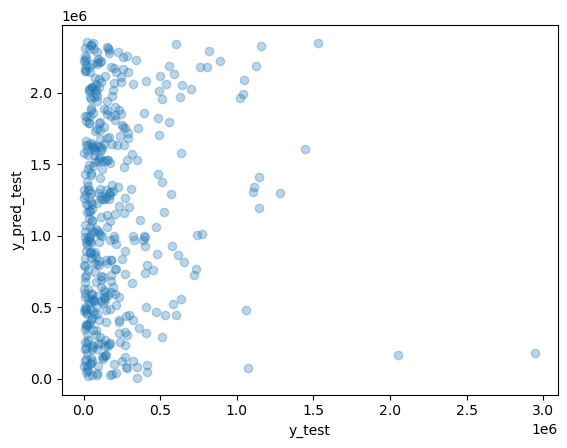

In [32]:
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')

<font color='red'>Assignment:</font> Calculate the test loss.

In [33]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_pred_test)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_pred_test)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_pred_test)))

train MAE: 9.97e+05
train MSE: 1.45e+12
train R2: -15.792


## 3.2 Mean Model

<font color='red'>Assignment:</font> Build a class providing the mean of **y_train** as predictions.

In [41]:
class mean_value(object):
    """
    This class provides mean value 
    of y_train as predictions.
    """
    
    def fit(self, y_train):
        self.mean = y_train.mean()
        
    def predict(self, y_test):
        return pd.Series([self.mean] * len(y_test))

<font color='red'>Assignment:</font> Train a model, make prediction, visulize the comparision between prediction and ground truth, and calculate train/test loss.

In [42]:
model = mean_value()

In [43]:
model.fit(y_train)

In [44]:
y_train_pred = model.predict(y_train)

Text(0, 0.5, 'y_train_pred')

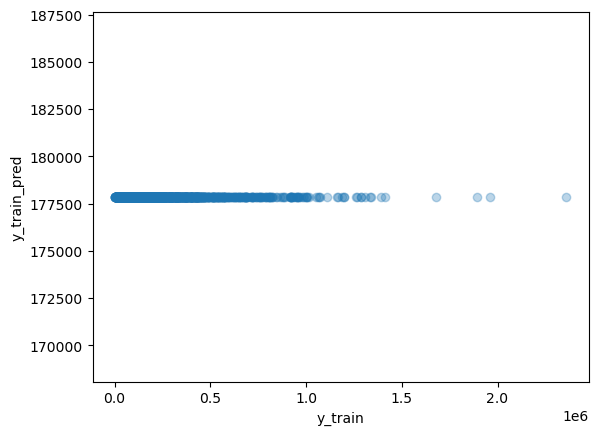

In [45]:
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

In [46]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.36e+05
train MSE: 4.26e+10
train R2: 0.000


In [47]:
y_pred_test = model.predict(y_test)

Text(0, 0.5, 'y_pred_test')

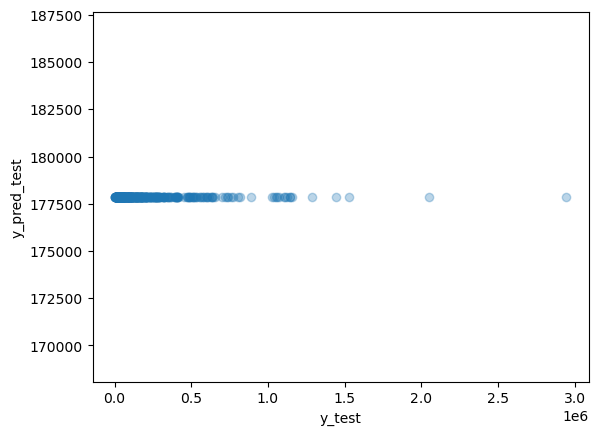

In [48]:
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')

In [49]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_pred_test)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_pred_test)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_pred_test)))

train MAE: 1.70e+05
train MSE: 8.73e+10
train R2: -0.013


<font color='red'>Question:</font> Is the mean-value model better than random guess?

In [50]:
"""
Here are the metrics of the test loss between the two model:
Random_guess:
train MAE: 9.97e+05
train MSE: 1.45e+12
train R2: -15.792

Mean:
train MAE: 1.70e+05
train MSE: 8.73e+10
train R2: -0.013

All the metrics suggest the errors between the predicted values and actual test values are smaller in the mean-value model.
So the mean-value model is better than random guess model.
"""

'\nHere are the metrics of the test loss between the two model:\nRandom_guess:\ntrain MAE: 9.97e+05\ntrain MSE: 1.45e+12\ntrain R2: -15.792\n\nMean:\ntrain MAE: 1.70e+05\ntrain MSE: 8.73e+10\ntrain R2: -0.013\n\nAll the metrics suggest the errors between the predicted values and actual test values are smaller in the mean-value model.\nSo the mean-value model is better than random guess model.\n'